<a href="https://colab.research.google.com/github/dtype2100/Python/blob/master/cluster_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mango_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac/sesac_mini_project/망고 진짜(최종).csv')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac/sesac_mini_project/kakaomapAPI_crawling(selenium).csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac/sesac_mini_project/kakao_preprocessing.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac/sesac_mini_project/mango_preprocessing.csv')

In [ ]:
test

,Unnamed: 0,title,rating,address,category,url,lat,lng,new_category,menu,tel,new_cate
0,1,바이러닉에스프레소바 ...,4.7,서울시 영등포구 여의도동 17,카페 / 디저트,https://www.mangoplate.com/restaurants/DgRCxk7...,37.525641,126.918618,카페,"['아메리카노', '라떼', '바닐라라떼', '마카다미아라떼', '코코넛꼼빠냐']",-,cafe
1,32,카페 레이어드 (더현...,4.3,서울시 영등포구 여의도동 22,카페 / 디저트,https://www.mangoplate.com/restaurants/aTEl_UE...,37.526029,126.928308,카페,"['클래식버터스콘', '바질스콘', '갈릭크림스콘', '딸기스콘', '말차스콘']",02-3277-8551,cafe
2,33,그레이에스프레소,4.3,서울시 영등포구 여의도동 44-35,카페 / 디저트,https://www.mangoplate.com/restaurants/kcl5lSQ...,37.519091,126.930914,카페,"['아메리카노', '카페라떼', '카푸치노', '플랫화이트', '레몬에이드']",070-7720-0131,cafe
3,46,코끼리베이글,4.2,서울시 영등포구 양평동3가 69,카페 / 디저트,https://www.mangoplate.com/restaurants/4TBJd9g...,37.528991,126.893139,카페,"['버터솔트', '라떼', '플레인베이글', '갈릭퐁당']",070-4184-0082,cafe
4,59,마얘 (더현대서울점),4.2,서울시 영등포구 여의도동 22,카페 / 디저트,https://www.mangoplate.com/restaurants/OM0hR6_...,37.526029,126.928308,카페,"['딱뜨 바니', '레그죠', '딱뜨 오 폼', '랑고 호즈', '딱뜨 오 쇼콜라']",-,cafe
...,...,...,...,...,...,...,...,...,...,...,...,...
995,263,징기스 (영등포점),3.6,서울시 영등포구 영등포동3가 11-5,기타 일식,https://www.mangoplate.com/restaurants/e19dcf4...,37.517306,126.908697,식당,-,02-2677-5606,jap
996,941,편백집 (타임스퀘어점),-,서울시 영등포구 영등포동4가 442,기타 일식,https://www.mangoplate.com/restaurants/ZnxYwuD...,37.517007,126.904142,식당,-,02-2633-7824,jap
997,7,로바 (더현대서울점),4.5,서울시 영등포구 여의도동 22,퓨전 일식,https://www.mangoplate.com/restaurants/oK1UfMi...,37.526029,126.928308,식당,"['런치코스 A', '런치코스 B', '디너코스 A', '디너코스 B', '디너코스...",02-3277-0652,jap
998,360,토끼정 (타임스퀘어),3.3,서울시 영등포구 영등포동4가 442,퓨전 일식,https://www.mangoplate.com/restaurants/-6La7db...,37.517007,126.904142,식당,-,02-2636-0503,jap


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac/sesac_mini_project/kakao_영등포구맛집.csv')
#len(df)

In [ ]:
mango_df

,title,rating,address,category,url,lat,lng,new_category,menu,tel
0,스시아라타,4.7,서울시 영등포구 여의도동 34-8,회 / 스시,https://www.mangoplate.com/restaurants/vZ74ooB...,37.521257,126.928871,식당,"['평일런치 스시오마카세', '평일디너 스시오마카세', '주말 스시오마카세']",02-2636-9417
1,바이러닉에스프레소바 ...,4.7,서울시 영등포구 여의도동 17,카페 / 디저트,https://www.mangoplate.com/restaurants/DgRCxk7...,37.525641,126.918618,카페,"['아메리카노', '라떼', '바닐라라떼', '마카다미아라떼', '코코넛꼼빠냐']",-
2,히노노리,4.7,서울시 영등포구 여의도동 23-6,기타 일식,https://www.mangoplate.com/restaurants/vVNatXW...,37.523328,126.923439,식당,-,02-6747-0773
3,허브족발 (본점),4.6,서울시 영등포구 당산동6가 237-38,고기 요리,https://www.mangoplate.com/restaurants/q20qRCRIIS,37.534224,126.902961,식당,"['앞다리족발', '뒷다리족발', '매콤족발', '앞다리족발 매콤족발 (반반)', ...",02-2633-4339
4,우미노미,4.6,서울시 영등포구 당산동4가 31-2,돈부리 / 일본 카레 / 벤토,https://www.mangoplate.com/restaurants/LGXola8...,37.530237,126.899325,식당,"['카이센동', '차돌스키야키', '사케동', '카이센동 모듬']",02-3667-4027
...,...,...,...,...,...,...,...,...,...,...
995,카페 오브,-,서울시 영등포구 양평동5가 120-2,카페 / 디저트,https://www.mangoplate.com/restaurants/qx2m_ZI...,37.540349,126.895660,카페,-,02-2631-9647
996,한양원,-,서울시 영등포구 여의도동 44-36,고기 요리,https://www.mangoplate.com/restaurants/Tz1o7OXVDV,37.519150,126.930520,식당,-,02-761-9292
997,고반식당 (서여의도점),-,서울시 영등포구 여의도동 17-9,고기 요리,https://www.mangoplate.com/restaurants/BPQ6mym...,37.526576,126.918188,식당,-,02-786-0092
998,은행골 (여의도점),-,서울시 영등포구 여의도동 44-21,회 / 스시,https://www.mangoplate.com/restaurants/p-b7223...,37.520721,126.929123,식당,-,02-784-4988


In [ ]:
df.shape

(1412, 13)

In [ ]:
df

,ID,stores,X,Y,road_address,place_url,menu,category,business_hours,rating,phone_number,last_update,n_cate
0,1379673133,광명대창집 영등포구청점,126.897125,37.526299,서울 영등포구 당산로32길 2,http://place.map.kakao.com/1379673133,"['대창덮밥', '해물짬뽕', '추천소대창구이(150g)', '막창구이(150g)'...","곱창,막창",NaN,3.6,02-2636-8411,2022.08.08.,kor
1,16708812,본죽 영등포구청점,126.896984,37.526316,서울 영등포구 당산로 132,http://place.map.kakao.com/16708812,"['단호박죽', '낙지김치죽', '삼계죽', '전복죽', '쇠고기야채죽', '신짬뽕...",본죽,매일 09:00 ~ 21:00,3.6,02-2634-7742,2022.06.10.,kor
2,177078961,시골집,126.896200,37.527125,서울 영등포구 당산로33길 5,http://place.map.kakao.com/177078961,NaN,한식뷔페,NaN,5.0,010-7793-2847,2022.04.28.,kor
3,1985593786,은성감자탕,126.897359,37.526721,서울 영등포구 국회대로34길 8-2,http://place.map.kakao.com/1985593786,"['뼈해장국', '뼈우거지탕', '김치뼈해장국', '뼈김치탕(중)', '감자탕(소)']",감자탕,NaN,4.7,NaN,2022.07.14.,kor
4,158556173,찜생찜사 묵은지김치찜,126.897663,37.526700,서울 영등포구 당산로32길 7-7,http://place.map.kakao.com/158556173,"['생삼겹 김치찜(소)', '생목살 김치찜(소)', '스팸 김치찜(소)', '생삼겹...",한식,연중무휴 \n ...,3.1,02-2636-3346,2022.08.11.,kor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,7859006,켄싱턴호텔 여의도 브로드웨이,126.921959,37.530272,서울 영등포구 국회대로76길 16,http://place.map.kakao.com/7859006,"['조식 (성인)', '조식 (소인)', '중식 (성인)', '중식 (소인)', '...",뷔페,매일 07:00 ~ 21:30,4.1,02-6670-7260,2022.05.23.,etc
1408,53460752,켄싱턴호텔 여의도 ELF라운지,126.921960,37.530276,서울 영등포구 국회대로76길 16,http://place.map.kakao.com/53460752,"['뉴욕 핑크 버거', '헤산물 샤프론 부야베스', '소고기 크림 스튜와 아란치니'...",뷔페,매일 07:00 ~ 21:00,0.0,02-6670-7331,2020.12.16.,etc
1409,36727652,저팔계마라탕,126.931055,37.526230,서울 영등포구 여의나루로 117,http://place.map.kakao.com/36727652,NaN,음식점,NaN,0.0,NaN,2021.06.23.,etc
1410,9945672,이삭토스트 당산역점,126.902672,37.533815,서울 영등포구 양평로 36,http://place.map.kakao.com/9945672,"['크리미 치킨', '레드 치킨', '콘치즈', '그릴드 불갈비', '그릴드 불고기...",이삭토스트,월~토 07:00 ~ 22:00,2.8,02-2677-4706,2022.04.05.,toast


In [ ]:
df['rating'].replace('-', 'np.nan')

0       3.6
1       3.6
2       5.0
3       4.7
4       3.1
       ... 
1407    4.1
1408    0.0
1409    0.0
1410    2.8
1411    0.0
Name: rating, Length: 1412, dtype: float64

In [ ]:
le = LabelEncoder()
result = le.fit_transform(df['category'])
label_df = pd.DataFrame(result, columns=['labelencoder'])
print('columns: ', len(label_df.columns))

columns:  1


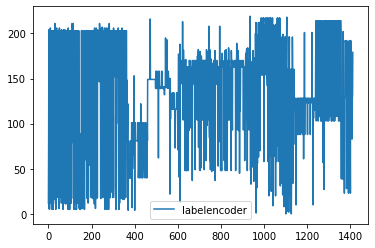

In [ ]:
label_df.plot()

In [ ]:
label_df['labelencoder'].unique()

array([ 12,  78, 204,   6, 203,   5,  17, 133, 206,  82, 152, 109, 146,
        16, 211,  44,  18, 174,  19,  85,  96,  24, 155, 127, 159,  11,
        89,  87,  97,  30,  79,  46,  54, 117, 151,  60, 136,  43, 119,
        99, 147, 176, 207,  14, 100, 107,  67,  81, 148, 101, 122,  42,
         4,  50,  40,   7,  65, 153,  72, 149, 215, 216, 139, 158, 141,
       150, 140, 138,  62, 132, 195, 193,  22, 105, 134, 116,  73,  71,
       112, 177,  41, 188,  13, 163, 170, 144, 165, 213, 104, 182,  48,
       171, 113, 130,  92,  93, 126,  95,  37,  49, 168, 175, 118,  74,
       180,  51, 156,  59,  69,  98, 178, 208,  94,  84, 172,  55,  47,
       167, 181,  53,  80, 143, 184, 111, 164, 189,  45, 114, 183, 219,
        33, 169,  52,  36, 173, 121, 200, 157, 212,   1,  70,  38,  29,
       198,  56, 194, 110, 185,  63, 217, 154, 209,  58, 142,  20, 145,
        64,  25,   9,  86,  75, 135, 210,  90,  31, 160, 196,  34,  35,
       102,  21, 199, 197, 191, 137,  66,   8,  32,  15, 187,   

In [ ]:
one_hot_df = pd.get_dummies(df['category'])
print('columns: ', len(one_hot_df.columns))

columns:  220


In [ ]:
one_hot_df

,60계,7번가피자,BHC치킨,KFC,가마로강정,갈비,감자탕,강창구찹쌀진순대,거성치킨,"게,대게",...,해산물,해장국,햄버거,호밀호두,"호프,요리주점",홍짜장,홍콩반점0410,회,훌랄라,흑화당
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
min_max = MinMaxScaler()
min_max_scaler = min_max.fit_transform(one_hot_df)

In [ ]:
min_max_scaler

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
min_max = MinMaxScaler()
min_max_label = min_max.fit_transform(result.reshape(-1, 1))

In [ ]:
for i in min_max_label:
  print(i)

In [ ]:
min_max_label

array([[0.05479452],
       [0.35616438],
       [0.93150685],
       ...,
       [0.5890411 ],
       [0.59817352],
       [0.8173516 ]])

In [ ]:
min_max_onehot_df = pd.DataFrame(min_max_scaler)

In [ ]:
min_max_label_df = pd.DataFrame(min_max_label)

In [ ]:
min_max_onehot_df

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


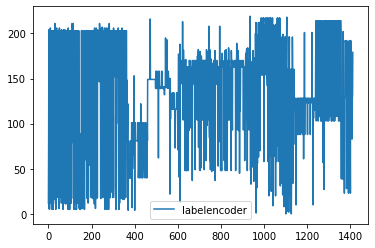

In [ ]:
label_df.plot()

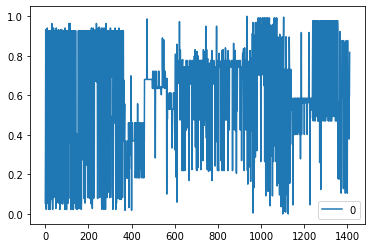

In [ ]:
min_max_label_df.plot()

In [ ]:
min_max_onehot_df

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
sr = scaler.fit_transform(one_hot_df)
sr_df = pd.DataFrame(sr)

In [ ]:
scaler = StandardScaler()
sr = scaler.fit_transform(result.reshape(-1, 1))
la_df = pd.DataFrame(sr)

# PCA

In [ ]:
pca = PCA(n_components=1)
one_pca = pca.fit_transform(min_max_onehot_df)
pca_df = pd.DataFrame(one_pca)
one_cat = pd.concat([pca_df, df['category']], axis=1)

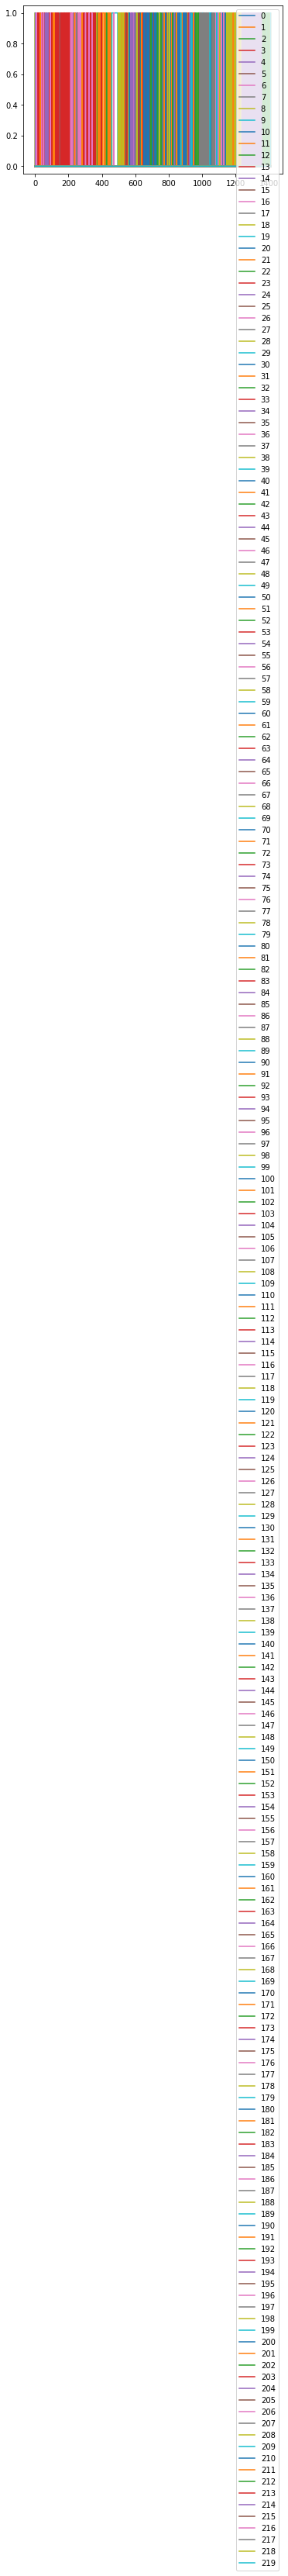

In [ ]:
min_max_onehot_df.plot()

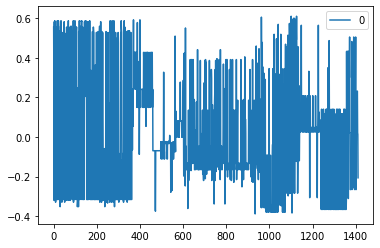

In [ ]:
pca_df.plot()

In [ ]:
pca = PCA(n_components=1)
label_pca = pca.fit_transform(min_max_label_df)
pca_df = pd.DataFrame(label_pca)
label_cat = pd.concat([pca_df, df['category']], axis=1)

In [ ]:
min_max_label_df

,0
0,0.054795
1,0.356164
2,0.931507
3,0.027397
4,0.926941
...,...
1407,0.378995
1408,0.378995
1409,0.589041
1410,0.598174


In [ ]:
label_pca

array([[ 0.55597811],
       [ 0.25460825],
       [-0.32073422],
       ...,
       [ 0.02173154],
       [ 0.01259912],
       [-0.20657896]])

In [ ]:
label_cat

,0,category
0,0.555978,"곱창,막창"
1,0.254608,본죽
2,-0.320734,한식뷔페
3,0.583375,감자탕
4,-0.316168,한식
...,...,...
1407,0.231777,뷔페
1408,0.231777,뷔페
1409,0.021732,음식점
1410,0.012599,이삭토스트


In [ ]:
min_max_label_df

In [ ]:
label_pca

array([[ 0.55597811],
       [ 0.25460825],
       [-0.32073422],
       ...,
       [ 0.02173154],
       [ 0.01259912],
       [-0.20657896]])

In [ ]:
min_max_label

In [ ]:
one_km = KMeans(n_clusters=20, random_state=42).fit(one_pca.reshape(-1,1))
one_pred = one_km.fit_predict(one_pca)
df['one_km.labels_'] = one_km.labels_

In [ ]:
la_km = KMeans(n_clusters=20, random_state=42).fit(label_pca.reshape(-1,1))
la_pred = la_km.fit_predict(min_max_label)
df['la_km.labels_'] = la_km.labels_

In [ ]:
df.head()

,ID,stores,X,Y,road_address,place_url,menu,category,business_hours,rating,phone_number,last_update,n_cate,la_km.labels_,one_km.labels_
0,1379673133,광명대창집 영등포구청점,126.897125,37.526299,서울 영등포구 당산로32길 2,http://place.map.kakao.com/1379673133,"['대창덮밥', '해물짬뽕', '추천소대창구이(150g)', '막창구이(150g)'...","곱창,막창",NaN,3.6,02-2636-8411,2022.08.08.,kor,19,18
1,16708812,본죽 영등포구청점,126.896984,37.526316,서울 영등포구 당산로 132,http://place.map.kakao.com/16708812,"['단호박죽', '낙지김치죽', '삼계죽', '전복죽', '쇠고기야채죽', '신짬뽕...",본죽,매일 09:00 ~ 21:00,3.6,02-2634-7742,2022.06.10.,kor,4,12
2,177078961,시골집,126.896200,37.527125,서울 영등포구 당산로33길 5,http://place.map.kakao.com/177078961,NaN,한식뷔페,NaN,5.0,010-7793-2847,2022.04.28.,kor,6,4
3,1985593786,은성감자탕,126.897359,37.526721,서울 영등포구 국회대로34길 8-2,http://place.map.kakao.com/1985593786,"['뼈해장국', '뼈우거지탕', '김치뼈해장국', '뼈김치탕(중)', '감자탕(소)']",감자탕,NaN,4.7,NaN,2022.07.14.,kor,11,15
4,158556173,찜생찜사 묵은지김치찜,126.897663,37.526700,서울 영등포구 당산로32길 7-7,http://place.map.kakao.com/158556173,"['생삼겹 김치찜(소)', '생목살 김치찜(소)', '스팸 김치찜(소)', '생삼겹...",한식,연중무휴 \n ...,3.1,02-2636-3346,2022.08.11.,kor,6,1


In [ ]:
df.groupby(['one_km.labels_', 'la_km.labels_', 'n_cate', 'category', 'stores']).sum()

ID  \
one_km.labels_ la_km.labels_ n_cate category stores                   
0              17            cafe   제과,베이커리  고구마명가 당산역점    19039317   
                                             과자점루프리텔캄    1304281097   
                                             글로리아 제과점      15770013   
                                             꽃길          1046273667   
                                             나카산          713473881   
...                                                             ...   
19             17            jap    일식       제이레스토랑       507915262   
                                             카게무샤          16623018   
                                             쿠사           215535339   
                                             포리타           10041245   
                                             화담           171248151   

                                                                  X  \
one_km.labels_ la_km.labels_ n_cate category stores                   
0              17            cafe   제과,베이커리  고구마명가 당산역점  126.902663   
                                             과자점루프리텔캄    126.899355   
                                             글로리아 제과점    126.902912   
                                             꽃길          126.922245   
                                             나카산         126.896895   
...                                                             ...   
19             17            jap    일식       제이레스토랑      126.916790   
                                             카게무샤        126.921259   
                                             쿠사          126.924526   
                                             포리타         126.921245   
                                             화담          126.920913   

                                                                 Y  rating  
one_km.labels_ la_km.labels_ n_cate category stores                         
0              17            cafe   제과,베이커리  고구마명가 당산역점  37.533826     0.0  
                                             과자점루프리텔캄    37.530266     0.0  
                                             글로리아 제과점    37.533660     0.0  
                                             꽃길          37.529980     0.0  
                                             나카산         37.532322     5.0  
...                                                            ...     ...  
19             17            jap    일식       제이레스토랑      37.527234     4.4  
                                             카게무샤        37.529558     0.0  
                                             쿠사          37.529751     5.0  
                                             포리타         37.529551     2.7  
                                             화담          37.530873     4.6  

[1406 rows x 4 columns]

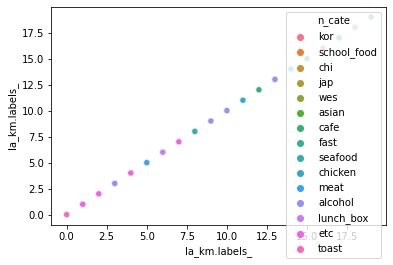

In [ ]:
sns.scatterplot(data=df, x='la_km.labels_', y='la_km.labels_', hue='n_cate')

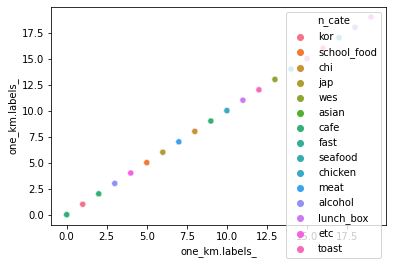

In [ ]:
sns.scatterplot(data=df, x='one_km.labels_', y='one_km.labels_', hue='n_cate')

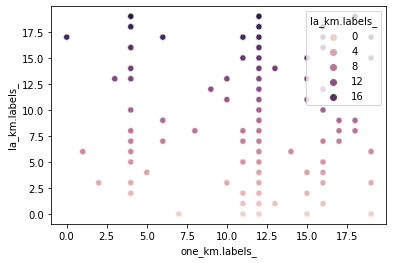

In [ ]:
sns.scatterplot(data=df, x='one_km.labels_', y='la_km.labels_', hue='la_km.labels_')

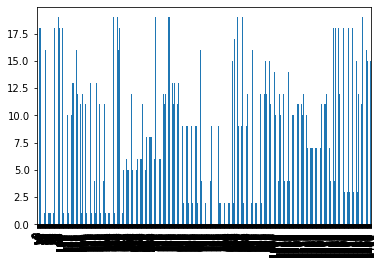

In [ ]:
df['one_km.labels_'].plot(kind='bar')

In [ ]:
la_km.labels_

array([19,  4,  6, ...,  0,  0, 16], dtype=int32)

In [ ]:
one_centers = one_km.cluster_centers_
print(one_centers)

[[-0.0237865 ]
 [ 0.7754098 ]
 [-0.62538269]
 [-0.03401084]
 [-0.02023253]
 [-0.02842547]
 [-0.02196575]
 [-0.03671625]
 [-0.0257795 ]
 [-0.03241835]
 [-0.02268462]
 [-0.02081696]
 [-0.01963901]
 [-0.02309514]
 [-0.02530825]
 [-0.02051977]
 [-0.01993041]
 [-0.02123354]
 [-0.02239471]
 [-0.02170145]]


In [ ]:
la_centers = la_km.cluster_centers_
print(la_centers)

[[ 0.02589592]
 [ 0.52410418]
 [-0.27145064]
 [-0.13022314]
 [ 0.2395103 ]
 [ 0.18943598]
 [-0.32161233]
 [ 0.44361673]
 [-0.07410578]
 [ 0.13516581]
 [ 0.34115869]
 [ 0.58914322]
 [-0.16728383]
 [-0.36826846]
 [ 0.08354243]
 [ 0.38909401]
 [-0.21905994]
 [-0.03443285]
 [ 0.28387351]
 [ 0.55700919]]


In [ ]:
four_df = df[df['rating'] >= 4.0]

In [ ]:
df['km.labels_'].value_counts()

KeyError: ignored

In [ ]:
four_df.groupby(['km.labels_', 'stores', 'n_cate', 'road_address', 'place_url']).sum()

In [ ]:
four_df

In [ ]:
four_df[four_df['road_address'].str.contains('은행로 ')]

In [ ]:
df.to_csv('km_test.csv')

In [ ]:
df['km.labels_'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cate_df, cate_lis, test_size=0.2, shuffle=True, random_state=42)